# The Hanoi-tower problem
Solved by using recursion.

In [1]:
#move a object from(f) one place to the target(t)
def move(f,t):
    print("move disc form {} to {}!".format(f,t))

In [2]:
move("A","B")

move disc form A to B!


In [3]:
#move a object from(f) via(v) to the target(t)
def moveVia(f,v,t):
    move(f,v)
    move(v,t)

In [4]:
moveVia("A","C","B")

move disc form A to C!
move disc form C to B!


In [5]:
#actual Hanoi problem, in order not no solve negative amounts of objects we need the pass statement
def hanoi(n,f,h,t):
    if n==0:
        pass
    else:
        hanoi(n-1,f,t,h)
        move(f,t)
        hanoi(n-1,h,f,t)

In [6]:
hanoi(5,"A","C","B")

move disc form A to B!
move disc form A to C!
move disc form B to C!
move disc form A to B!
move disc form C to A!
move disc form C to B!
move disc form A to B!
move disc form A to C!
move disc form B to C!
move disc form B to A!
move disc form C to A!
move disc form B to C!
move disc form A to B!
move disc form A to C!
move disc form B to C!
move disc form A to B!
move disc form C to A!
move disc form C to B!
move disc form A to B!
move disc form C to A!
move disc form B to C!
move disc form B to A!
move disc form C to A!
move disc form C to B!
move disc form A to B!
move disc form A to C!
move disc form B to C!
move disc form A to B!
move disc form C to A!
move disc form C to B!
move disc form A to B!


# Visualisation of the Hanoi-problem
Although the instruction that are printed out above are fine. A visualisation of this recipe helps to understand the underlying problem.

In [7]:
from sage.plot.polygon import polygon
from copy import deepcopy

In [8]:
def myRandom(k): return floor(k*random())
def make_3xN_matrix(k,N):
    return matrix(ZZ,[[myRandom(k) for tower in (1..N)] for peg in (1..3)])

## Definiton of tower of Hanoi
A similar syntax as in our initial example is used {def hanoi(n,f,h,t):}. 

In [9]:
def TowerOfHanoi(n ,from_rod,to_rod,aux_rod,Re):
    global GlobalStateRegisterT
    if n == 1:
        Re[Integer(from_rod)]-=1
        Re[Integer(to_rod)]+=1
        GlobalStateRegisterT.append(copy(Re))
        #print( "Move disk 1 from rod",from_rod,"to rod",to_rod,Re)
        
        return 
    TowerOfHanoi(n-1, from_rod, aux_rod, to_rod,Re)
    Re[Integer(from_rod)]-=1
    Re[Integer(to_rod)]+=1
    GlobalStateRegisterT.append(copy(Re))
    #print ("Move disk",n,"from rod",from_rod,"to rod",to_rod,Re )
    TowerOfHanoi(n-1, aux_rod, to_rod, from_rod,Re) 

### State of Tower
The three towers are represented by three Fifos. The first initial state would look like:

 * first state: [[0,1,2],[ ],[ ]],second state: [[0,1],[2],[ ]] and so on.....

Additionally the StateVectorT represent the increment/decrement of each tower:

 * from the first state to the second state: [(-1,1,0)]

In [10]:
def setStateFifos(rN,GlobalStateRegisterT):
    stateVectorT=[]
    for s in range(1,len(GlobalStateRegisterT)) :
        diffRS=vector(GlobalStateRegisterT[s])-vector(GlobalStateRegisterT[s-1])
        stateVectorT.append(copy(diffRS))
    #show(stateVectorT) 
    
    r_0=[0..rN-1]
    r_1=[]
    r_2=[]
    minus=0;plus=0;
    stateFifos=[]
    stateFifos.append([copy(r_0),copy(r_1),copy(r_2)])
    for s in stateVectorT :
        for c in range(0,len(s)) :
            if s[c]==-1 :
                minus=c
            if s[c]== 1 :
                plus=c
        if minus==0 :
            t=r_0.pop()
        elif minus==1 :
            t=r_1.pop()
        else :
            t=r_2.pop()
        #show('r_0 : ',r_0,' r_1 : ',r_1,' r_2 : ',r_2,' plus : ',plus,' minus : ',minus )         
       
        if plus==0 :
            r_0.append(t)
            
        elif plus==1 :
            r_1.append(t)
        else :
            r_2.append(t)
        stateFifos.append([copy(r_0),copy(r_1),copy(r_2)])
        #show('r_0 : ',r_0,' r_1 : ',r_1,' r_2 : ',r_2)
    return(stateFifos,stateVectorT)


## Building the Hanoi Tower
This function build a list with the three towers each filled with all the rings. 
Notation going forward:
* rN : the total number of rings
* heightRing : height of each ring
* widestRing: width of the widest ring
* diffWidthRing : difference between each ring width (n) ring width(n+1) 
* thicknessRing : thickness of the line in the drawing
* xStartRing : left side position of the widest ring
* yStartRing : bottom side position of the widest ring
* colorSet : choose the different colors of the ring set
* positionRing :position of the ring, if positionRing<>ring, it means the ring is in transit
* polygonRing : return the position and color of the ring [[[xL,yL], [xH,yL], [xH,yH],[xL,yH]],colors]

In [11]:
def buildHanoisTowers(rN=3 ,heightRing=1,widestRing=12,diffWidthRing=12/10,rodWidth=12/10,thicknessRing=1/100, \
                   xStartRing=0,yStartRing=0, colorSet=3):
    polygonRing=[]   
    colorRingsT=sorted(colors)[mod(rN*(colorSet),len(sorted(colors)))]
    xL=xStartRing; xH=xStartRing+widestRing ;yL=yStartRing; yH=yStartRing+heightRing 
    pT=[]
    pTT=[]

    for L in range (0,3):
        pT=[];
        for C in range(0,rN):
            pT.append([[[xL,yL], [xH,yL], [xH,yH],[xL,yH]],\
            sorted(colors)[mod(rN*(colorSet+ C^2),len(sorted(colors)))]])
            xL+=diffWidthRing;xH-=diffWidthRing;yL+=(ringHeight+thicknessRing);yH+=(ringHeight+thicknessRing);
        #show(pT)
        hRod=heightRing
        rodX=(widestRing/2+xStartRing)-rodWidth/2
        pT.append([[(rodX,yL), (rodX + rodWidth,yL), (rodX+rodWidth,yH),(rodX,yH)],'black'])
        pT.append([[(rodX,yStartRing), (rodX + rodWidth,yStartRing), (rodX+rodWidth,yL),(rodX,yL)],'black'])
        xStartRing+=widestRing+rodWidth
        xL=xStartRing; xH=xStartRing+widestRing ;yL=yStartRing; yH=yStartRing+heightRing
        pTT.append(pT)
    return(pTT)

In [12]:
def verifyPolygonT(rN,polygonT):
    i=0
    for p in polygonT:
        print ('                     Tower : ' +str(i))
        #show(p)
        j=0
        for pp in p:
            if j< rN :
                print ('ring : ' +str(j))
            else :
                 print ('peg : ' +str(j-rN))
            show(pp)
            j+=1
        i+=1
    return

### Change position of ring
This funciton chagne the inital ring Y postion wiht the real postion of the ring into his fifo.

In [13]:
def changeYringsCoordinates(A_,B):
    A=deepcopy(A_)
    for i in range(0,len(A[0])) :
        A[0][i][1]=B[0][i][1]
        #print (A[0][i][1],B[0][i][1],' : ',B[0][i][1],A[0][i][1])
    return A    

### States List
This function builds the Hanoi's Towers differents States List.

In [14]:
def allStatePolygonsCompile(rN,polygonT,stateFifos ):
    polygonST=[]
    polygonSTT=[]
    for towerState in range(0,len(stateFifos)) :
    # for test :for towerState in range(0,4) :
        polygonST=[]
        for rod in range(0,len(stateFifos[towerState])):

                for fifoPosition in range(0,len(stateFifos[towerState][rod])) :
                    ring=copy(stateFifos[towerState][rod][fifoPosition])
                    #print ( " rod : ",rod, "fifo position : ",fifoPosition," ring : ",ring)
                    polygonST.append(changeYringsCoordinates(deepcopy(polygonT[rod][ring]),\
                                                 deepcopy(polygonT[rod][fifoPosition])))
                    #show("polygonST : ",polygonST)
         
        polygonSTT.append(polygonST)
        #print ("next state")               
    return(polygonSTT)    

### Number of rings

In [15]:
rN=5

### first ring at index 1

In [16]:
initialHanoiTowers=[rN, 0, 0]
#print ("initialHanoiTowers : ", initialHanoiTowers)

### show (GlobalStateRegisterT)

In [17]:
GlobalStateRegisterT=[]
GlobalStateRegisterT.append(copy(initialHanoiTowers))
TowerOfHanoi(rN, '0', '1', '2',initialHanoiTowers) 

### show(stateFifos, stateVectorT)

In [18]:
stateFifos,stateVectorT=setStateFifos(rN,GlobalStateRegisterT)
xStart=0
ringHeight=1
yStart=(rN^2 -1)*ringHeight*(rN)
polygonT=buildHanoisTowers(rN)

### verifyPolygonT(rN,polygonT)

In [19]:
allStatePolygonsCompiled=allStatePolygonsCompile(rN,polygonT,stateFifos )

## Visuvisualize Hanoi's Tower Problem

In [20]:
figSizeXmax=10
figSizeYmax=5
def viewvPolygonT(rN,polygonTest,figSizeXmax,figSizeYmax):
    """this function builds the graphical view of the different polygons"""
    G1=plot([0,0])
    #show(allStatePolygonsCompiled)
    polygonGT1=[]
    for s in polygonTest :
        polygonGT1=[]
        G1=plot([0,0])
        #show(s)
        for p in s:
            #print (s)
            polygonGT1.append(polygon(p[0],alpha=0.75, \
            fill=True, thickness=1/100,axes=False,figsize=[figSizeXmax,figSizeYmax],  \
            color=p[1]))
########################################################
        for rod in range(0,len(polygonT)) :
            for rodPolygon in range(0,len(polygonT[rod])) :
                if rodPolygon ==rN :
                    #  top rod
                    #show(polygonT[rod][rodPolygon])
                    polygonGT1.append(polygon(polygonT[rod][rodPolygon][0],alpha=0.45, \
                        fill=True, thickness=1/100,axes=False,figsize=[figSizeXmax,figSizeYmax],   \
                        color=polygonT[rod][rodPolygon][1]))
                elif rodPolygon==rN+1 :
                    # bottom rod
                    polygonGT1.append(polygon(polygonT[rod][rodPolygon][0],alpha=0.35, \
                        fill=True, thickness=1/100,axes=True,figsize=[figSizeXmax,figSizeYmax] , \
                        color=polygonT[rod][rodPolygon][1]))
########################################################
        for pg1 in polygonGT1 :
            G1+=pg1
        G1.show(figsize=[figSizeXmax,figSizeYmax],xmin=0,xmax=40,ymin=0,ymax=10)
    return

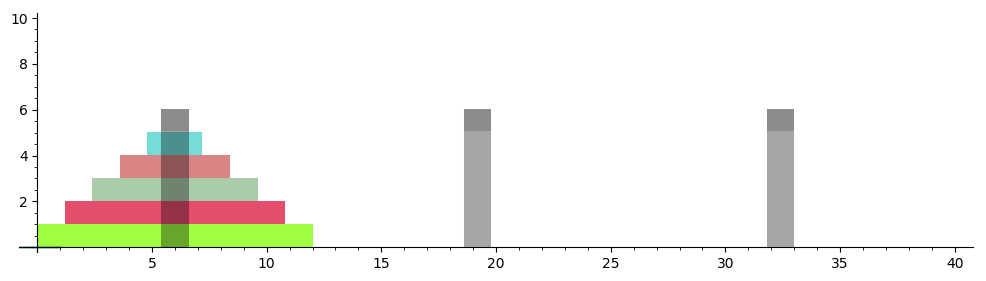

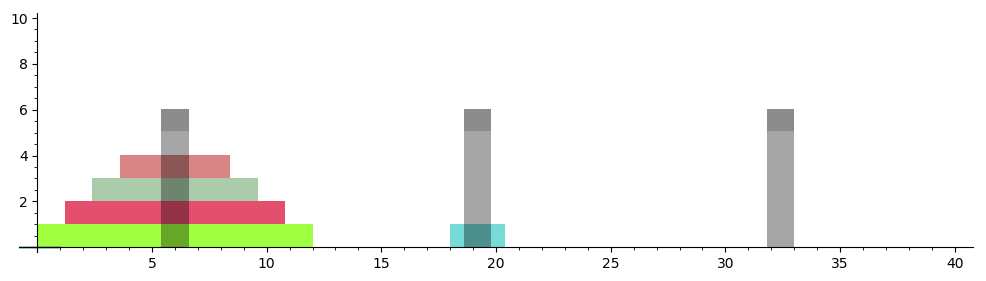

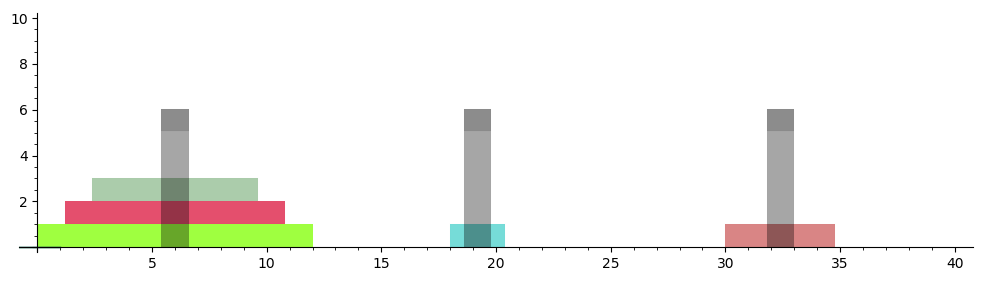

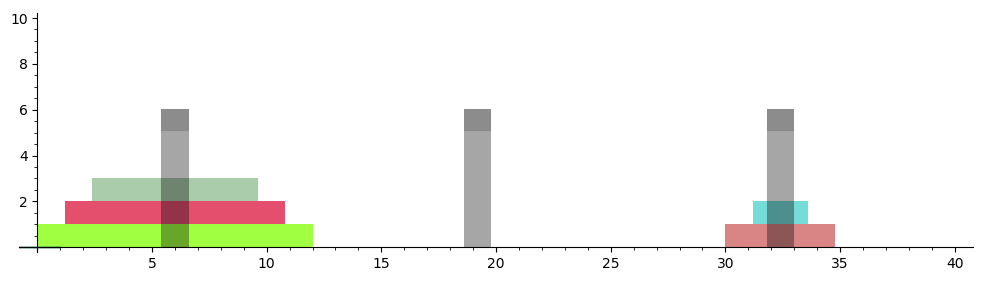

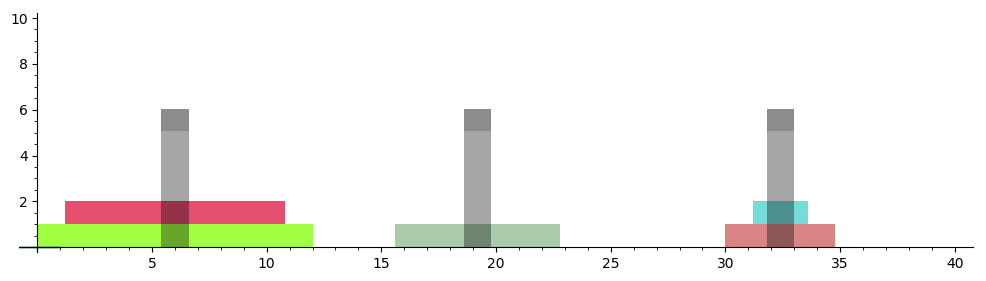

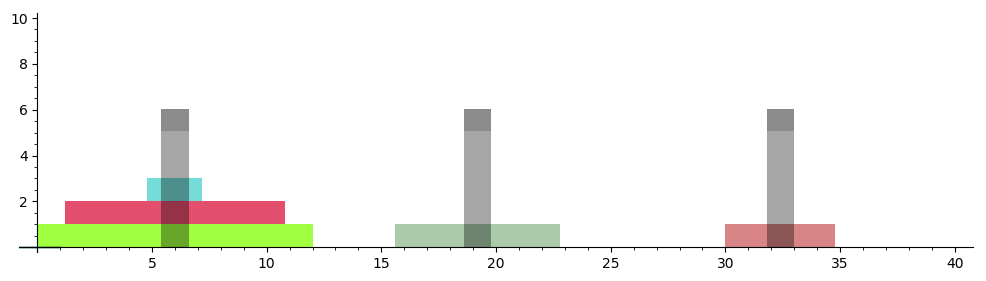

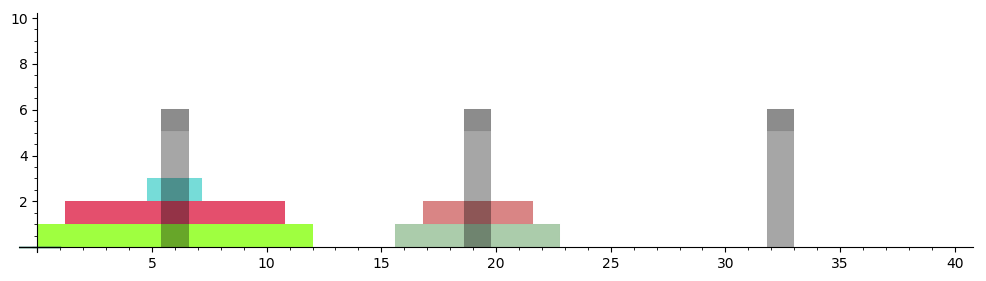

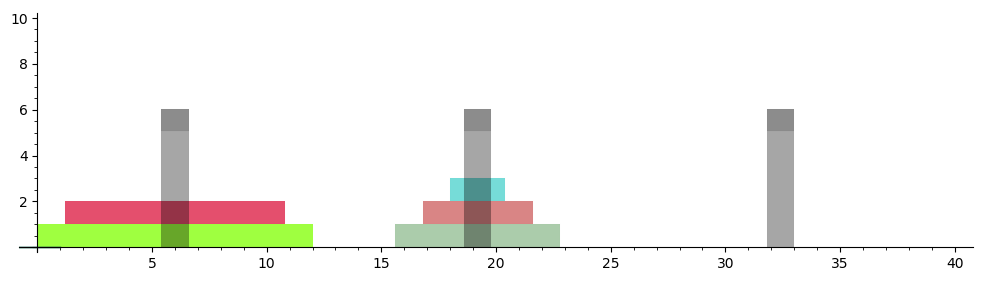

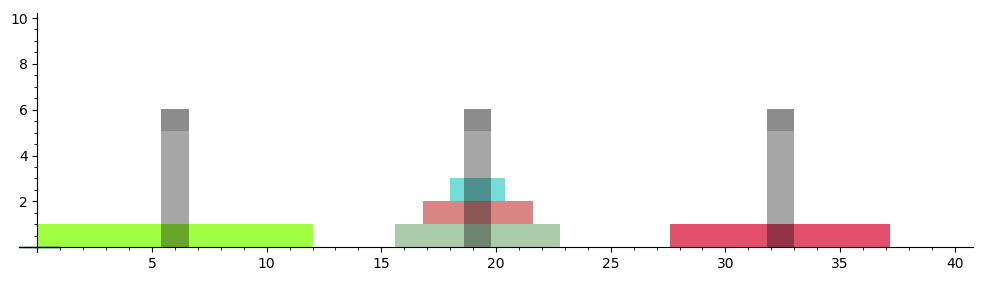

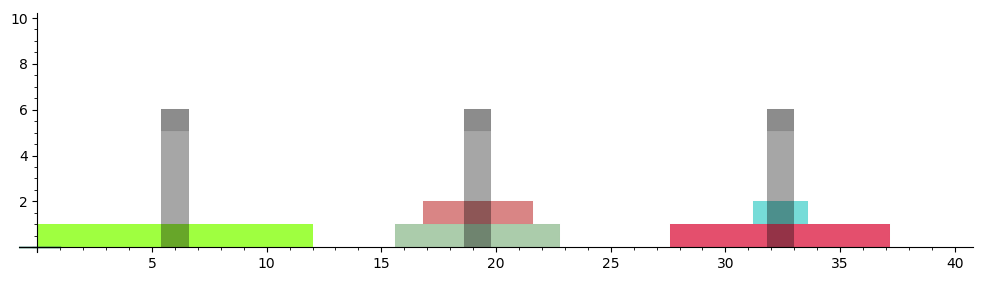

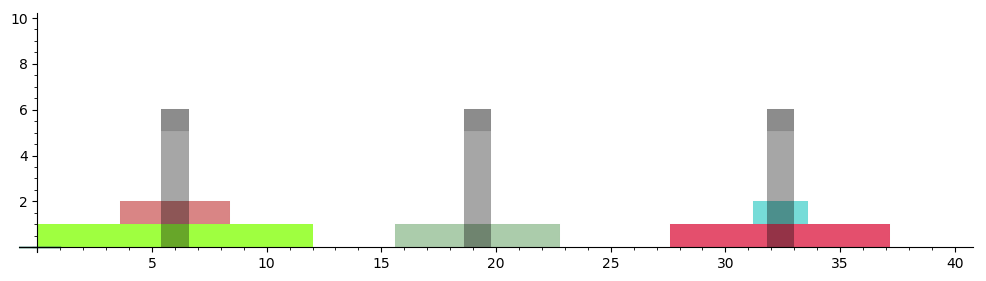

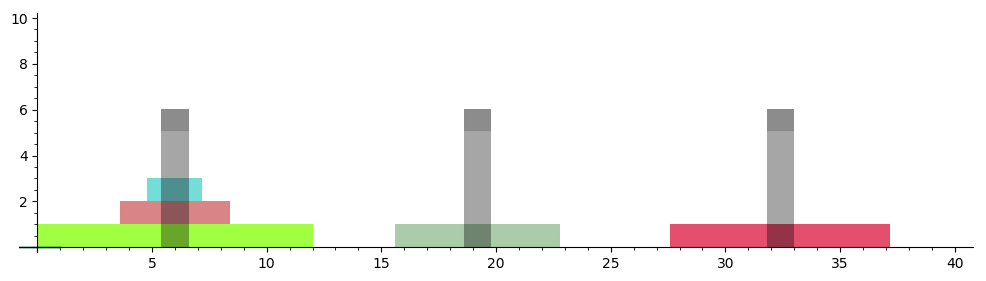

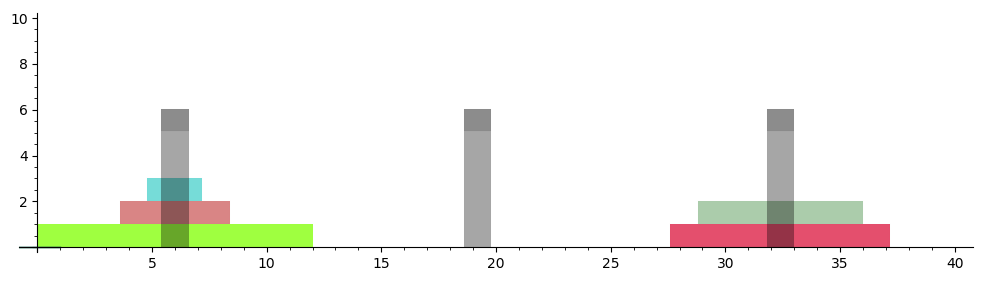

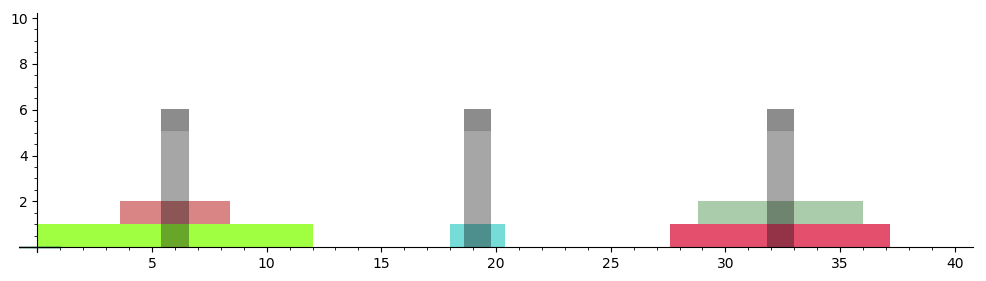

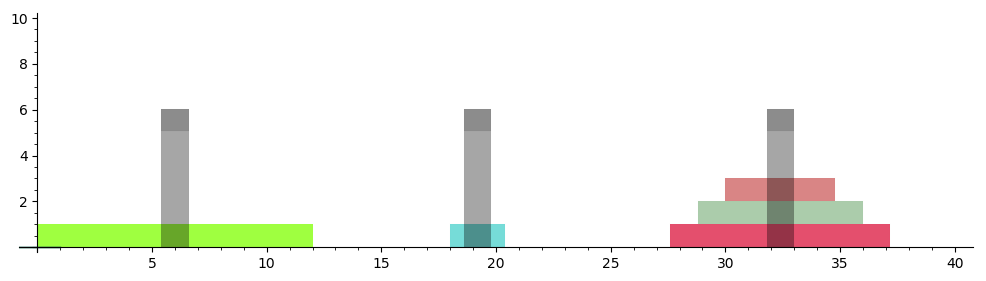

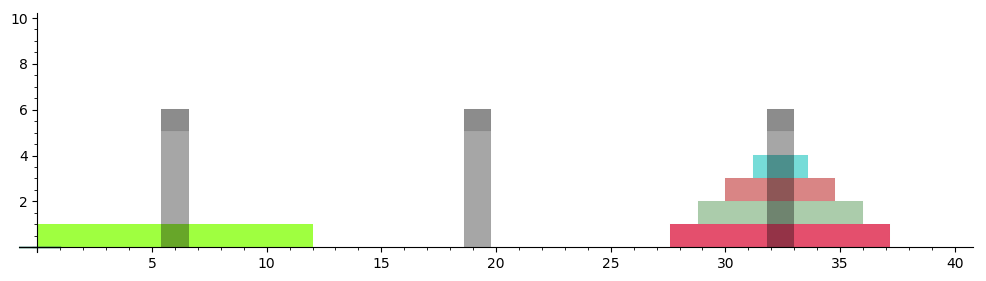

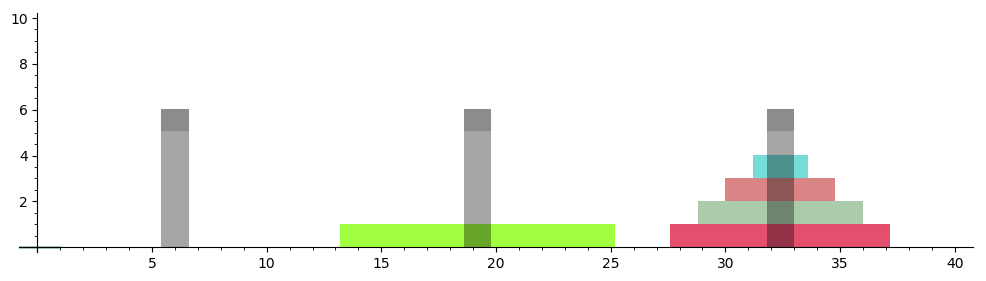

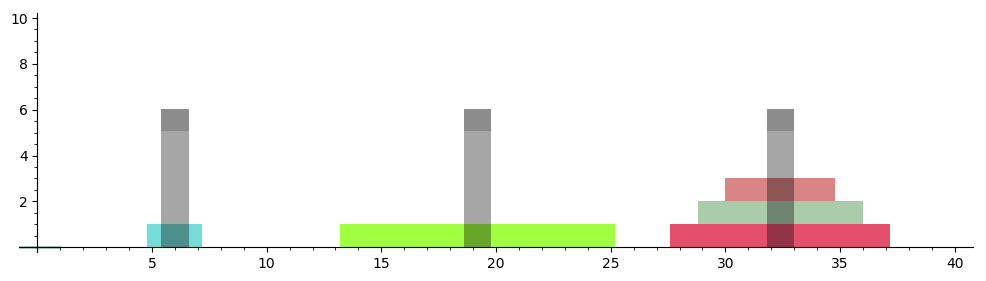

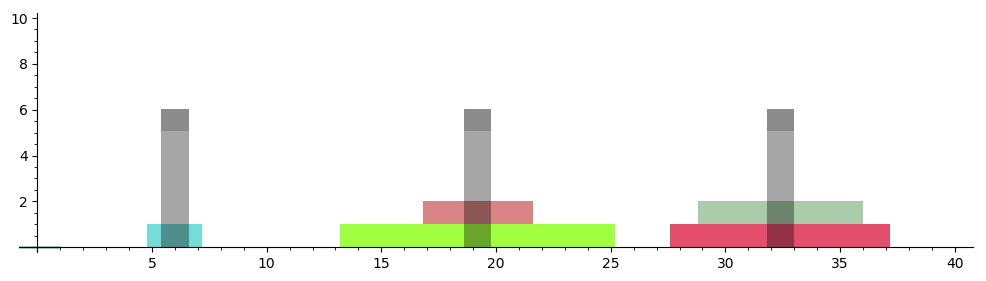

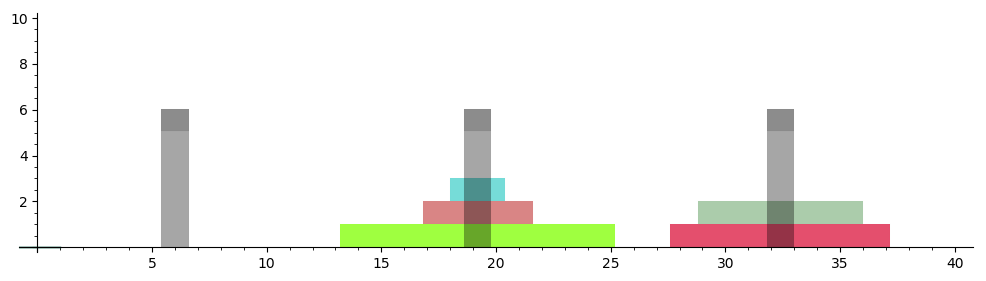

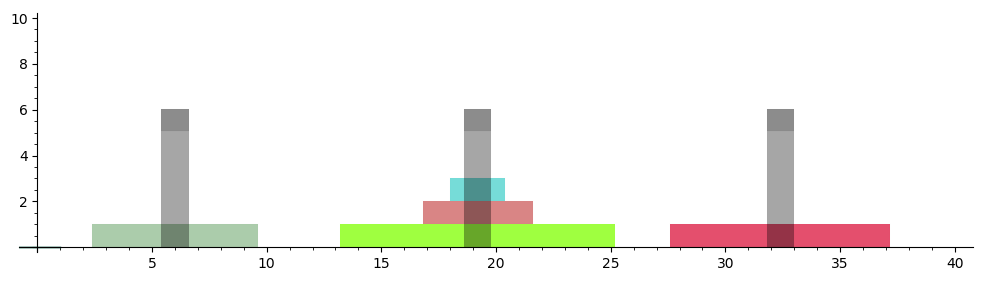

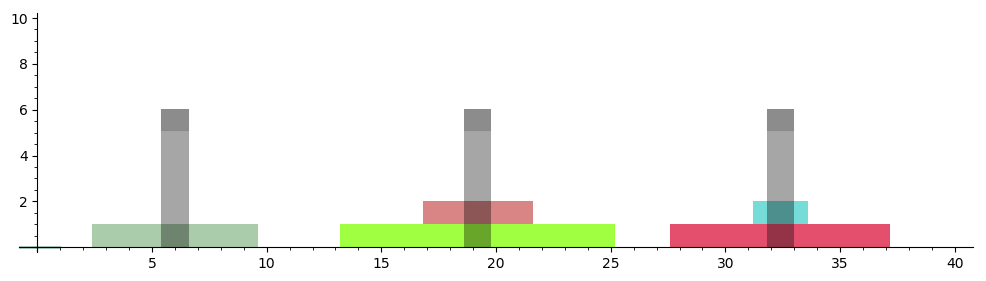

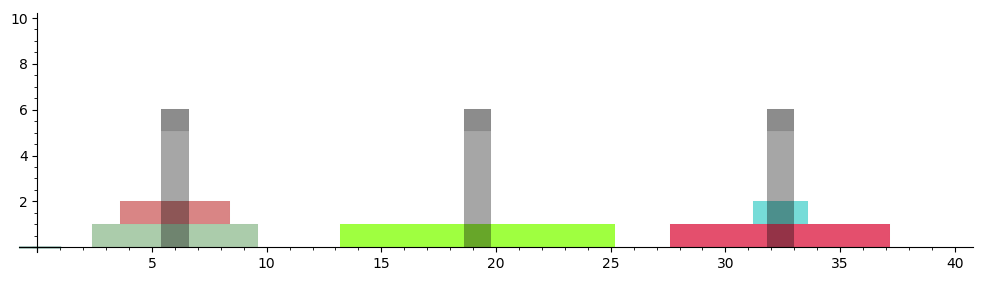

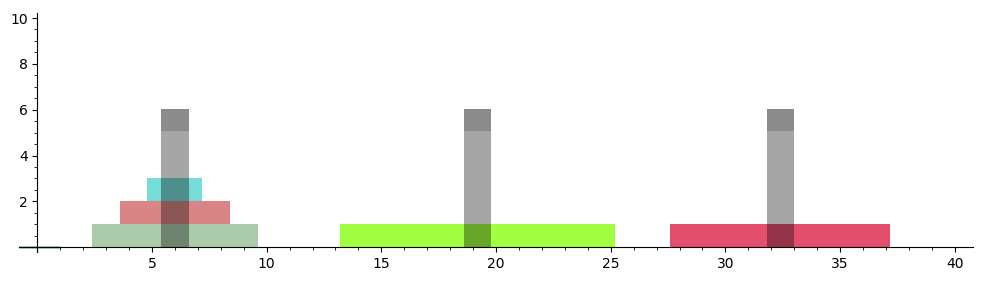

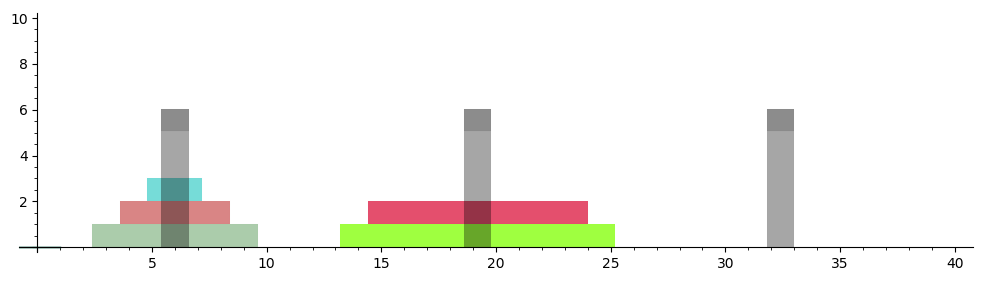

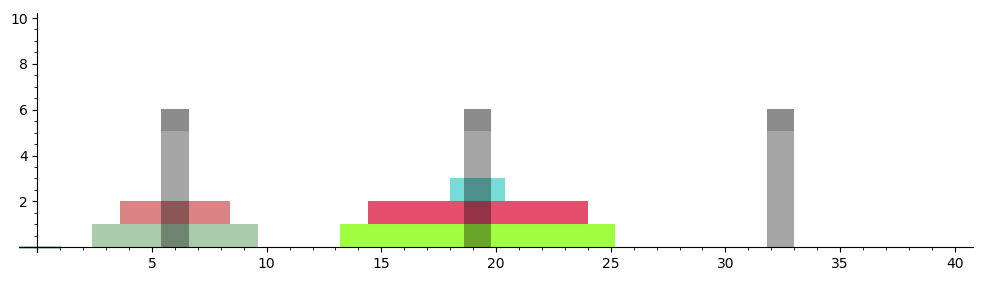

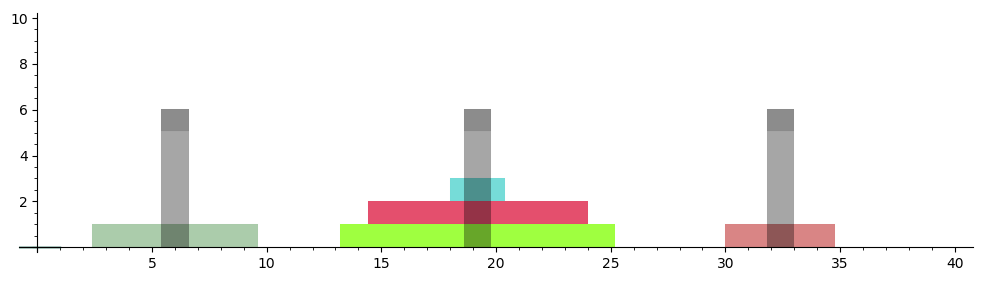

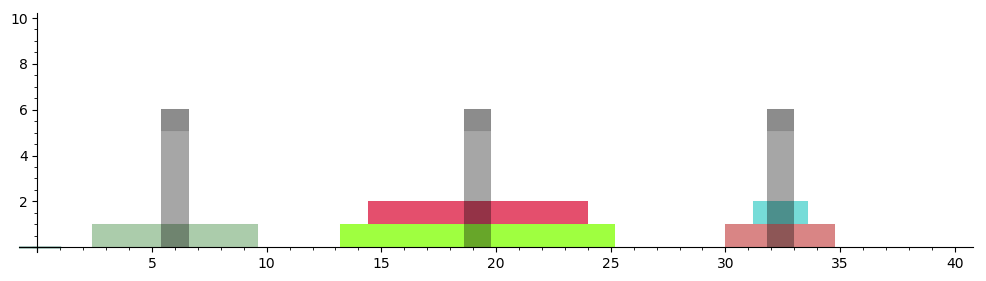

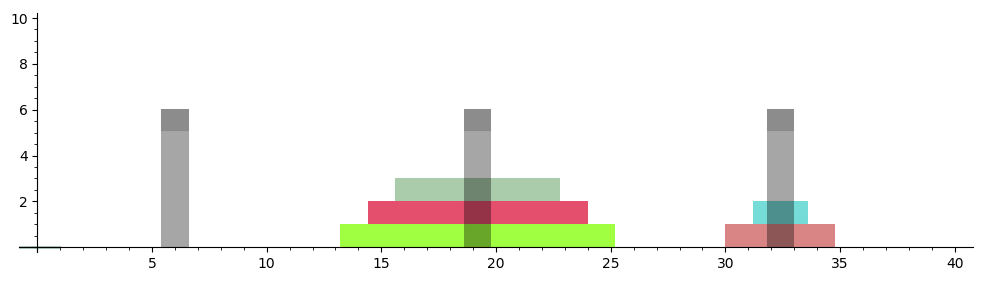

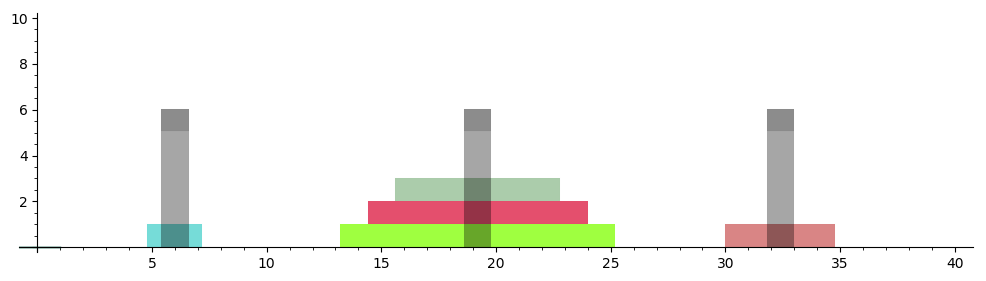

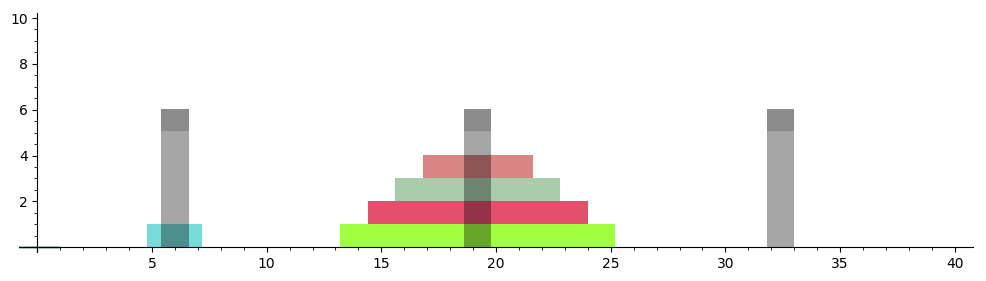

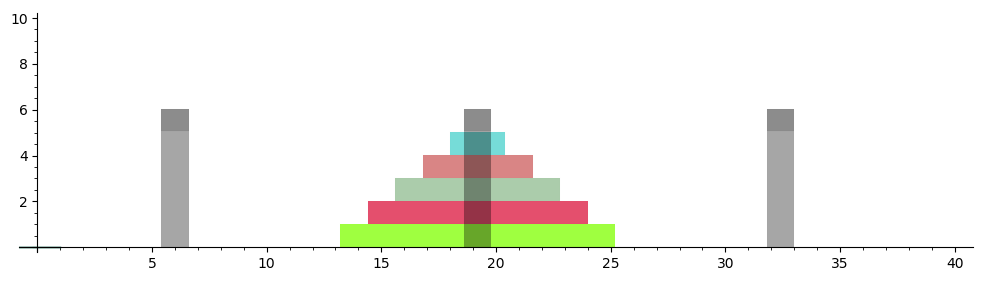

In [21]:
#viewvPolygonT(rN,polygonT)
viewvPolygonT(rN,allStatePolygonsCompiled,figSizeXmax,figSizeYmax)